In [1]:
from ContraDC import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Data saved in ContraDC_data.txt


/Users/nitl_admin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val


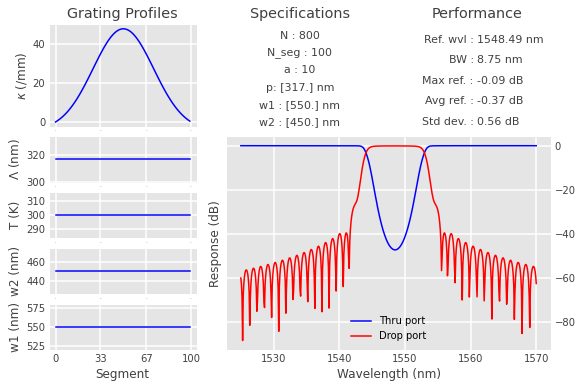

In [6]:
# w1=0.56e-6
# w2=0.45e-6
w1 = 550e-9
#[570e-9, 550e-9]
w2 = 450e-9
#[450e-9, 430e-9]
#w_chirp_step = 0.05e-9
N=800
period = 317e-9
wvl_range=[1525e-9,1570e-9]
T = 300
#[500,400]
#[300,400]

device = ContraDC(N=N,w1=w1,w2=w2,apod_shape="gaussian",period=period,wvl_range=wvl_range,T=T)

device.simulate().WvlData().displayResults()

#22.27e-9 w1,2
#13.08e-9 w1
#17.31e-9 w2

Bandwidth = 20.47094188376741


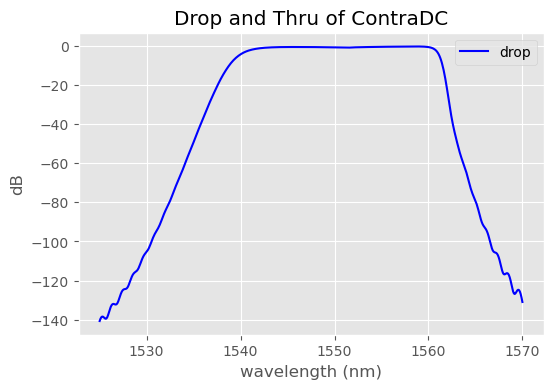

In [48]:
# import data from Contradc_data.txt
# import numpy as np
# data = np.loadtxt("ContraDC_data.txt")
# # Initialize empty lists for each column
wvl = []
thru = []
drop = []

# Open and read the file
with open('results/ContraDCData_[3.12e-07]_[300, 500]_.txt', 'r') as file:
    lines = file.readlines()

    # Iterate through each line and split it by comma
    for line in lines:
        values = line.strip().split(',')

        # Append the values to the respective lists
        wvl.append(float(values[0]))
        thru.append(float(values[1]))
        drop.append(float(values[2]))

wvl2 = []
thru2 = []
drop2 = []
with open('results/ContraDCData_[3.17e-07]_[500, 400]_.txt', 'r') as file:
    lines = file.readlines()

    # Iterate through each line and split it by comma
    for line in lines:
        values = line.strip().split(',')

        # Append the values to the respective lists
        wvl2.append(float(values[0]))
        thru2.append(float(values[1]))
        drop2.append(float(values[2]))

# Now, you can use column1, column2, and column3 for plotting or further processing.

# sum the elements of the two list
drop= np.array(drop)
drop2 = np.array(drop2)
drop3= np.maximum(3*drop,3*drop2)
# drop3 = [(x + y)/2 for x, y in zip(drop, drop2)]
# thru3 = [(x + y)/2 for x, y in zip(thru, thru2)]

#max drop -3dB
dropMax = max(drop3)
drop_array = np.array(drop3)
wvl_array = np.array(wvl)
drop3dB = wvl_array[drop_array > dropMax - 3]
Bandwidth = drop3dB[-1] - drop3dB[0]
print("Bandwidth =", Bandwidth)



import matplotlib.pyplot as plt
plt.plot(wvl, drop3)
#plt.plot(wvl, thru3)
plt.xlabel('wavelength (nm)')
plt.ylabel('dB')
plt.title('Drop and Thru of ContraDC')
plt.legend(['drop', 'thru'])
#INCREAse the resolution of the plot
plt.rcParams['figure.dpi'] = 100
#save the plot
plt.savefig('ContraDC.png')
plt.show()


In [ ]:
#two period garings functions

#period=[317e-9,320e-9]

def Simulation(period):
    device = ContraDC(N=N,w1=w1,w2=w2,apod_shape="gaussian",period=period,wvl_range=wvl_range,T=T)
    device.simulate().WvlData()
    return 0

def Thru_Drop(period,filename):
    wvl = []
    thru = []
    drop = []

    # Open and read the file
    with open('results/'+filename, 'r') as file:
        lines = file.readlines()

    # Iterate through each line and split it by comma
    for line in lines:
        values = line.strip().split(',')

        # Append the values to the respective lists
        wvl.append(float(values[0]))
        thru.append(float(values[1]))
        drop.append(float(values[2]))
    return wvl,thru,drop

In [110]:
import numpy as np
lamd=[1525e-9,1570e-9]
wvl=np.linspace(lamd[0],lamd[-1],5)
print(wvl)


[1.52500e-06 1.53625e-06 1.54750e-06 1.55875e-06 1.57000e-06]


In [138]:
neff= np.zeros((5,5,5))
neff[0][0][0]=1.45
neff[0,0,1]=1.22
neff[0,0,2]=1.33
neff[0,0,3]=1.09

neff[1,0,0]=1.78
# np.savetxt('neff_test.txt', neff.flatten())
# print(neff)

A = np.array([1, 2, 3])
B = np.tile(A, (2,2,2))
print(B)

# def save3darray(array, filename):
#     with open(filename, 'w') as outfile:
#         #outfile.write('# Array shape: {0}\n'.format(array.shape))
#         for data_slice in array:
#             #keep 5 decimal places
#             np.savetxt(outfile, data_slice, fmt='%-7.7f')
#             #np.savetxt(outfile, data_slice, fmt='%-7.2f')
#             outfile.write('\n')    

# save3darray(neff, 'neff_test3.txt')            

[[[1 2 3 1 2 3]
  [1 2 3 1 2 3]]

 [[1 2 3 1 2 3]
  [1 2 3 1 2 3]]]


In [166]:
def w1_w2_lambda(w1,w2,lamda):
    w1=np.linspace(w1[0],w1[-1],5)
    w2=np.linspace(w2[0],w2[-1],5)
    lamda=np.linspace(lamda[0],lamda[-1],5)
    #convertthem to string

    #save w1 ,w2, lamda in three lines of a txt file without brackets
    with open('w1_w2_lambda.txt', 'w') as outfile:
        outfile.write('{0}\n'.format(w1))
        outfile.write('{0}\n'.format(w2))
        outfile.write('{0}\n'.format(lamda))
    
    with open('w1_w2_lambda.txt', 'r') as file:
        lines = file.readlines()
        l_line = []
        # Iterate through each line and remove the brackets and save the file
        for line in lines:
            l_line.append(line)
    file.close()
    
    with open('w1_w2_lambda.txt', 'w') as outfile:
        for line in l_line:
            values = line.replace('[', '')
            values = values.replace(']', '')
            outfile.write(values)




w1=[550e-9, 570e-9]
w2=[430e-9, 450e-9]
Landa=[1.4e-6, 1.7e-6] #wavelength
w1_w2_lambda(w1,w2,Landa)

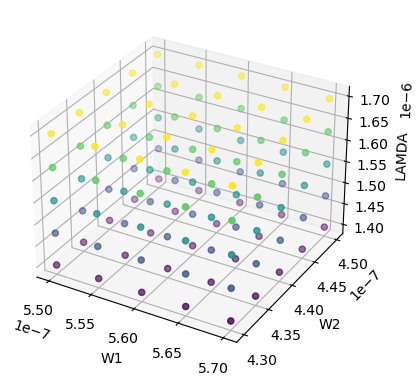

In [12]:
#read text file
with open('w1_w2_lambda.txt', 'r') as file:
    lines = file.readlines()
    l_line = []
    # Iterate through each line and remove the brackets and save the file
    for line in lines:
        l_line.append(line)
file.close()

#plot the data in 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np



# Data
w1 = np.linspace(550e-9, 570e-9, 5)
w2 = np.linspace(430e-9, 450e-9, 5)
lamda = np.linspace(1.4e-6, 1.7e-6, 5)

# Meshgrid of the data
W1, W2, LAMDA = np.meshgrid(w1, w2, lamda)

# Flatten the arrays to make them compatible with 3D plotting
W1 = W1.flatten()
W2 = W2.flatten()
LAMDA = LAMDA.flatten()

# 3D Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#make it rainbow colored
ax.scatter(W1, W2, LAMDA, c=LAMDA, marker='o') 
#ax.scatter(W1, W2, LAMDA, c='g', marker='o')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('LAMDA')
#mkae the size
plt.rcParams['figure.dpi'] = 100
#save the plot
plt.savefig('3dplot.png')
#make box tight
plt.tight_layout()
plt.show()



In [23]:
N_seg = 10
w1=[550e-9, 570e-9]
w_chirp_step=3e-9
resolution=5
test = np.tile(np.linspace(0,10,N_seg),(resolution,1))

w1_profile = np.linspace(w1[0],w1[-1],N_seg)
w1_profile = np.round(w1_profile/w_chirp_step)*w_chirp_step
w1_profile = np.round(w1_profile, 15)
w1_tiled = np.tile(w1_profile, (resolution,1))
stacked = np.stack((test, w1_tiled), axis=2)
#print(w1_profile)
print(stacked)

[[[0.00000000e+00 5.49000000e-07]
  [1.11111111e+00 5.52000000e-07]
  [2.22222222e+00 5.55000000e-07]
  [3.33333333e+00 5.58000000e-07]
  [4.44444444e+00 5.58000000e-07]
  [5.55555556e+00 5.61000000e-07]
  [6.66666667e+00 5.64000000e-07]
  [7.77777778e+00 5.67000000e-07]
  [8.88888889e+00 5.67000000e-07]
  [1.00000000e+01 5.70000000e-07]]

 [[0.00000000e+00 5.49000000e-07]
  [1.11111111e+00 5.52000000e-07]
  [2.22222222e+00 5.55000000e-07]
  [3.33333333e+00 5.58000000e-07]
  [4.44444444e+00 5.58000000e-07]
  [5.55555556e+00 5.61000000e-07]
  [6.66666667e+00 5.64000000e-07]
  [7.77777778e+00 5.67000000e-07]
  [8.88888889e+00 5.67000000e-07]
  [1.00000000e+01 5.70000000e-07]]

 [[0.00000000e+00 5.49000000e-07]
  [1.11111111e+00 5.52000000e-07]
  [2.22222222e+00 5.55000000e-07]
  [3.33333333e+00 5.58000000e-07]
  [4.44444444e+00 5.58000000e-07]
  [5.55555556e+00 5.61000000e-07]
  [6.66666667e+00 5.64000000e-07]
  [7.77777778e+00 5.67000000e-07]
  [8.88888889e+00 5.67000000e-07]
  [1.00000